## Conditional Shapley Values - Test 1

In [ ]:
from simulations import simulation1, simulation2
from shapley_values.causal_shap import Explainer, ShapleyValuesType

from shapley_values.utils import get_baseline
import numpy as np
from sklearn.linear_model import LinearRegression
import shap

np.random.seed(0)

X_test1, y_test1 = simulation1(num_samples=10000)

model_test1 = LinearRegression()
model_test1.fit(X_test1, y_test1)

feature_names = ["P", "F"]

sample = np.array([1.06, 2.43])

explainer = Explainer(X = X_test1, model = model_test1, is_classification=False, rounding_precision = 2, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL)

In [3]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),  # Predicted value for the sample
                                output_names=['Prediction'])

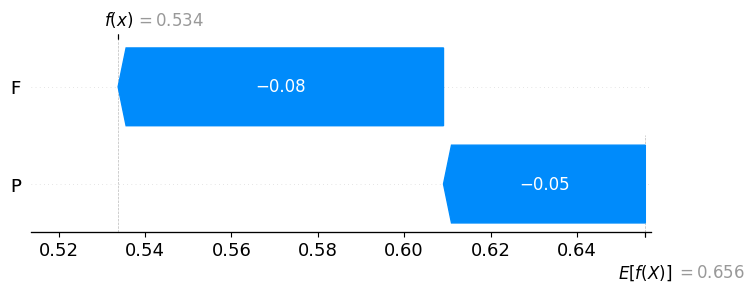

In [4]:
shap.plots.waterfall(explanation)

## Conditional Shapley Values - Test 2

In [17]:
X_test2, y_test2 = simulation2(num_samples=10000)

model_test2 = LinearRegression()
model_test2.fit(X_test2, y_test2)

feature_names = ["P", "F"]

sample = np.array([4, 3.8])

explainer = Explainer(X = X_test2, model = model_test2, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL)

Baseline Value (E[f(X)]):  0.9784966758364484
Predicted Value (f(x))  [3.8031419]
Shapley Values + (E[f(X)]):  3.814


In [18]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test2, model_test2),  # Predicted value for the sample
                                output_names=['Prediction'])

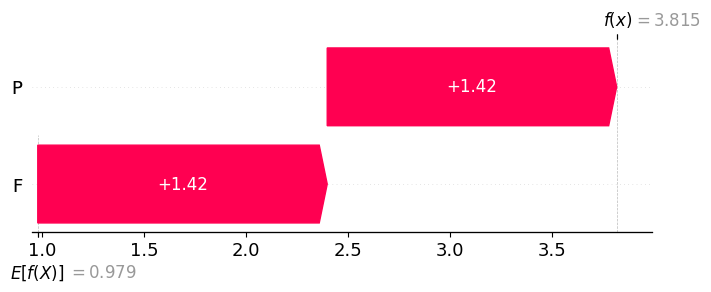

In [19]:
shap.plots.waterfall(explanation)

## Asymmetric Conditional Shapley Values - Test 1

In [31]:
causal_model = {"P": "F"}

feature_names = ["P", "F"]
sample = np.array([1.06, 2.43])

explainer = Explainer(X = X_test1, model = model_test1, is_classification=False, rounding_precision = 2, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL, is_asymmetric=True, causal_model = causal_model)

Baseline Value (E[f(X)]):  0.9405372674048602
Predicted Value (f(x))  [1.31962721]
Shapley Values + (E[f(X)]):  1.319


In [32]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),
                                output_names=['Prediction'])

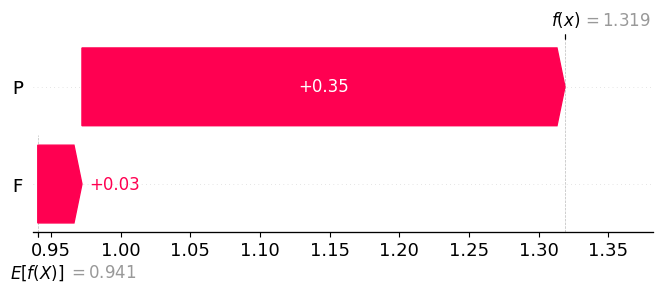

In [33]:
shap.plots.waterfall(explanation)

## Asymmetric Conditional Shapley values - Test 2

In [38]:
causal_model = {"F": "P"}

In [39]:
feature_names = ["P", "F"]

sample = np.array([4, 3.8])

explainer = Explainer(X = X_test2, model = model_test2, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL, is_asymmetric=True, causal_model=causal_model)

Baseline Value (E[f(X)]):  0.9784966758364484
Predicted Value (f(x))  [3.8031419]
Shapley Values + (E[f(X)]):  3.802


In [40]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test2, model_test2),
                                output_names=['Prediction'])

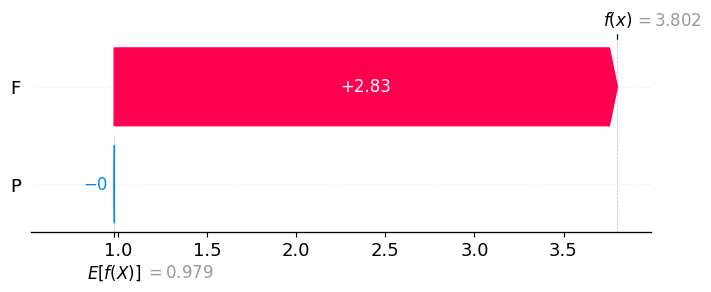

In [41]:
shap.plots.waterfall(explanation)

In [2]:
from simulations import simulation1, simulation2
from shapley_values.causal_shap import Explainer, ShapleyValuesType

from shapley_values.utils import get_baseline
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import pandas as pd

np.random.seed(0)


model_test1 = LinearRegression()
model_test1.fit([[1, 1], [1, 1], [0, 0], [0, 0]], [1, 1, 0, 0])

feature_names = ["P", "F"]

sample = np.array([0, 0])

explainer = Explainer(X = [[1, 1], [1, 1], [0, 0], [0, 0]], model = model_test1, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.CONDITIONAL)

Baseline Value (E[f(X)]):  0.5
Predicted Value (f(x))  [1.66533454e-16]
Shapley Values + (E[f(X)]):  0.0
